In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)
ac = pd.read_csv('result_filtered.csv')

In [3]:
ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])

In [4]:
ac.head()

,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,20:20,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,11:50,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,19:31,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,19:13,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,1,1,11,2,18:03,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [5]:
times = ac['time'].str.split(':')
minute = np.zeros(len(times))
count = 0
for t in times:
    t = int(t[0]) * 60 + int(t[1])
    minute[count] = t
    count += 1
ac['time'] = minute

In [6]:
ac.head()

,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,1,1,11,2,1083.0,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [7]:
ac = ac.rename(columns={"date": "month"})

In [8]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,9,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
4,1,1,11,2,1083.0,6,6,20,3,2,4,8,2,0,0,1,2,3,1,42,7,2,0,0,1,2,11,0,7,0,2,0,0,0,0,4,1,1,8,6700,2,2,3,1


In [9]:
ac.describe()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000,76066.000000
mean,1.910762,1.671391,6.791457,4.123209,856.314871,4.218560,5.264178,38.726395,2.538125,1.504470,2.116254,1.671364,1.374175,0.137394,0.091473,1.400021,1.684682,1.452699,1.377659,36.929325,6.337667,2.790603,0.233850,7.659730,1.085754,4.263403,9.130492,0.056859,15.461941,1.788145,2.278074,0.511227,2.160361,0.739371,2.413956,1.834223,4.738293,1.361752,6.491941,1237.755331,0.922370,6.212421,4.351629,1.110904
std,0.753181,1.171778,3.687687,1.951968,301.274958,1.477167,1.574765,14.332981,6.354184,2.403105,1.779552,1.758079,0.683854,0.896153,0.719337,0.490361,0.832348,0.709629,0.498996,19.437101,2.411949,0.439290,0.571046,10.021081,0.952025,3.248863,10.617689,0.680547,12.308299,12.478917,3.126421,1.531341,12.674309,2.024123,12.555289,1.305770,1.827862,0.535405,2.404212,1245.581439,1.431182,6.532552,3.234095,0.941086
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,3.000000,2.000000,655.000000,3.000000,6.000000,30.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,1.000000,1.000000,2.000000,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,5.000000,49.000000,1.000000,0.000000,2.000000,1.000000
50%,2.000000,1.000000,7.000000,4.000000,895.000000,4.000000,6.000000,30.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,9.000000,1.000000,4.000000,9.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,7.000000,1339.000000,1.000000,5.000000,4.000000,1.000000
75%,2.000000,2.000000,10.000000,6.000000,1075.000000,6.000000,6.000000,50.000000,3.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,9.000000,1.000000,7.000000,9.000000,0.000000,18.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,2.000000,8.000000,1796.000000,2.000000,11.000000,7.000000,1.000000
max,12.000000,19.000000,12.000000,7.000000,1439.000000,6.000000,9.000000,70.000000,99.000000,9.000000,7.000000,9.000000,9.00

In [10]:
#Set first_road_class from uclassified (6) to missing (-1)
ac['first_road_class'] = ac['first_road_class'].replace(6, -1)

In [11]:
##One Hot Encode Feature Road_class -> Motorway,A(M),A,B,C,Unclassified
# Road_Type: 9=Unknown, -1=DataMissing together as one value
#ac[ac['road_type'] == 9] = -1
ac['road_type'] = ac['road_type'].replace(9, -1)

In [12]:
#Set unknown Speed Limits (99) to 0
#ac[ac['speed_limit'] == 99] = -1
ac['speed_limit'] = ac['speed_limit'].replace(99, -1)

In [13]:
#Set unknown junction details (9,99, -1) to -1
#ac[ac['junction_detail'] == 9] = -1
#ac[ac['junction_detail'] == 99] = -1
ac['junction_detail'] = ac['junction_detail'].replace([9, 99], -1)

In [14]:
#Set missing junction details (9) to -1 (unknown)
#ac[ac['junction_control'] == 9] = -1
ac['junction_control'] = ac['junction_control'].replace(9, -1)

## Weather Conditions
### - maybe divide into two categories (fine, reain, snow) and (wind)

In [15]:
#Set light conditions other (8) and unknown(9) to -1 (missing)
#ac[ac['weather_conditions'] == 8] = -1
#ac[ac['weather_conditions'] == 9] = -1
ac['weather_conditions'] = ac['weather_conditions'].replace([8, 9], -1)

In [16]:
#road_surface_conditions unknown (9) to -1 (missing)
#ac[ac['road_surface_conditions'] == 9] = -1
ac['road_surface_conditions'] = ac['road_surface_conditions'].replace(9, -1)

In [17]:
#special_conditions_at_site set unknown (9) to -1
##ac[ac['special_conditions_at_site'] == 9] = -1
ac['special_conditions_at_site'] = ac['special_conditions_at_site'].replace(9, -1)

In [18]:
#carriageway_hazards set unknown (9) to missing
#ac[ac['carriageway_hazards'] == 9] = -1
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace(9, -1)

#set all animals on road (dog = 4, other = 5 , any = 7) to 10 (animal)
#ac[ac['carriageway_hazards'] == 4] = 10
#ac[ac['carriageway_hazards'] == 5] = 10
#ac[ac['carriageway_hazards'] == 7] = 10
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace([4, 5, 7], 10)

In [19]:
#Casualty Class: remove all rows where this is a pedestrian (3)
ac = ac[ac.casualty_class != 3]
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,23,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,17,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,45,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,21,5,3,0,3,1,7,3,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [20]:
ac[ac['casualty_class'] == 3]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type


In [21]:
#sex_of_casualty set unknown (9) to -1 (missing)
#ac[ac['sex_of_casualty'] == 9] = -1
ac['sex_of_casualty'] = ac['sex_of_casualty'].replace(9, -1)

In [22]:
ac[ac.sex_of_casualty == -1]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
17,4,2,11,2,888.0,3,3,30,3,2,1,1,1,0,0,1,2,1,-1,-1,-1,3,0,1,-1,-1,1,9,99,99,9,9,99,9,99,1,6,3,-1,-1,-1,-1,-1,-1
64,2,2,11,3,1018.0,-1,-1,20,3,2,7,1,1,0,0,1,2,2,-1,-1,-1,3,1,9,1,2,9,0,99,99,9,9,99,9,99,9,6,1,4,1598,2,1,2,1
279,2,1,11,6,765.0,-1,6,20,0,-1,1,1,1,0,0,1,2,1,-1,38,7,3,0,1,1,3,1,9,99,99,0,9,99,9,99,9,2,3,7,-1,-1,-1,3,1
316,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,0,1,3,2,9,1,1,9,0,99,99,9,9,99,9,99,9,6,1,5,1596,1,7,1,1
317,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,-1,-1,3,2,9,1,1,9,0,99,99,9,9,99,9,99,9,6,1,5,1596,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57443,2,1,4,3,1070.0,-1,6,30,0,-1,1,1,1,0,0,2,2,1,-1,-1,-1,3,0,1,3,3,1,0,17,0,0,0,0,0,0,1,6,3,-1,-1,-1,-1,3,3
58425,3,1,8,4,820.0,4,6,30,3,4,1,1,1,0,0,1,2,1,-1,-1,-1,3,0,1,-1,-1,1,0,4,0,1,0,0,0,0,3,6,3,-1,-1,-1,-1,-1,-1
59518,2,1,10,2,895.0,3,1,30,1,4,1,1,1,0,0,1,2,1,-1,18,4,3,0,3,3,9,3,0,18,0,8,0,0,0,0,1,6,3,4,125,1,3,9,3
61288,2,1,2,4,611.0,3,6,60,0,-1,1,1,1,0,0,2,2,1,-1,30,6,3,0,9,1,8,9,0,15,0,0,0,0,0,0,4,1,3,6,-1,-1,-1,8,1


In [23]:
#We remove age_of_casualty:
ac = ac.drop(columns=['age_of_casualty'])
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,3,-1,-1,3,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,3,1,1,3,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,3,1,3,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,3,1,6,3,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,3,1,7,3,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [24]:
#Car Passenger set Unknown (9) to (-1) missing
ac['car_passenger'] = ac['car_passenger'].replace(9, -1)

In [25]:
#casualty_type
#Remove Cyclists -> those where 10,000 of whom about 100 died
ac = ac[ac.casualty_type != 1]

#Remove Mobility Scooter Riders
ac = ac[ac.casualty_type != 22]

#Remove 80 Horse Riders
ac = ac[ac.casualty_type != 16]

#All Motorcycles into one class (120)
ac['casualty_type'] = ac['casualty_type'].replace([2, 3, 4, 5, 23, 97], 120)

#All cars into one class (130)
ac['casualty_type'] = ac['casualty_type'].replace([8, 9, 19], 130)

#All Transporters into one class (140)
ac['casualty_type'] = ac['casualty_type'].replace([17, 20, 21, 98], 140)

#All Busses/Trams into one class (150)
ac['casualty_type'] = ac['casualty_type'].replace([10, 11, 18], 150)

#Others (90) and Unknowns (97) to missing (-1)
ac['casualty_type'] = ac['casualty_type'].replace([90, 97], -1)

#TOBI: Plotte die Verteilungen von Autos und zugehörigen Toten

In [26]:
#Remove Vehicle_type as this is the same as Casualty_type
ac = ac.drop(columns=['vehicle_type'])

In [27]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,99,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,99,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [28]:
#towing_and_articulation
#Remove all missing rows, as no one of them died
ac = ac[ac.towing_and_articulation != -1]

In [29]:
#All with tows into one class (6)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace([1, 2, 3, 4], 6)

#Set Unknkown (9) to missing (-1)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace(9, -1)

#b = ac[ac.towing_and_articulation==-1]
#b[b['casualty_severity'] == 1]

In [30]:
# vehicle_manoeuvre
# All not moving cars into one class (50)
ac['vehicle_manoeuvre'] = ac['vehicle_manoeuvre'].replace([2, 3, 8, 10], 50)

for i in range(101):
    b = ac[ac['vehicle_manoeuvre'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
1  :  0.014925373134328358
4  :  0.002515371716042482
5  :  0.004186602870813397
6  :  0.009836065573770493
7  :  0.0031007751937984496
9  :  0.007396072430502423
11  :  0.009708737864077669
12  :  0.005076142131979695
13  :  0.025041736227045076
14  :  0.0024096385542168677
15  :  0.01090909090909091
16  :  0.029133029133029134
17  :  0.021870503597122302
18  :  0.013969106783075889
50  :  0.001911049339819319
99  :  0.0023228803716608595


In [31]:
#vehicle_location_restricted_lane
#Set unknown (99) to missing (-1)
ac['vehicle_location_restricted_lane'] = ac['vehicle_location_restricted_lane'].replace(99, -1)
for i in range(101):
    b = ac[ac['vehicle_location_restricted_lane'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0011507479861910242
0  :  0.012128440366972477
1  :  0.0
2  :  0.006060606060606061
3  :  0.0
4  :  0.0
5  :  0.0
6  :  0.040697674418604654
7  :  0.08108108108108109
8  :  0.0
9  :  0.02127659574468085


In [32]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,9,9,99,9,99,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,9,9,99,9,99,1,6,2,5,125,1,6,7,1


In [33]:
#junction_location

#Set unknown (9) to missing (-1)
ac['junction_location'] = ac['junction_location'].replace(9, -1)

In [34]:
#skidding_and_overturning
#Set unknown (9) to missing (-1)
ac['skidding_and_overturning'] = ac['skidding_and_overturning'].replace(9, -1)

In [35]:
#hit_object_in_carriageway
# #Set unknown (99) to missing (-1)
ac['hit_object_in_carriageway'] = ac['hit_object_in_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_in_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.011812731718860929
1  :  0.0
2  :  0.03076923076923077
4  :  0.010901162790697675
5  :  0.0
6  :  0.03773584905660377
7  :  0.015698587127158554
8  :  0.05555555555555555
9  :  0.024096385542168676
10  :  0.025252525252525252
11  :  0.004889975550122249
12  :  0.0


In [36]:
#vehicle_leaving_carriageway
#Set unknown (9) to missing (-1)
ac['vehicle_leaving_carriageway'] = ac['vehicle_leaving_carriageway'].replace(9, -1)

In [37]:
#hit_object_off_carriageway
#Set unknown (99) to missing (-1)
ac['hit_object_off_carriageway'] = ac['hit_object_off_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_off_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.008834719803959503
1  :  0.01616915422885572
2  :  0.024456521739130436
3  :  0.011450381679389313
4  :  0.055131004366812224
5  :  0.08571428571428572
6  :  0.020964360587002098
7  :  0.027777777777777776
8  :  0.3
9  :  0.020070838252656435
10  :  0.022816166883963495
11  :  0.02798708288482239


In [38]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,6,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,9,6,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,6,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,6,2,5,125,1,6,7,1


In [39]:
#first_point_of_impact
#Set unknown (9) to missing (-1)
ac['first_point_of_impact'] = ac['first_point_of_impact'].replace(9, -1)

In [40]:
#journey_purpose_of_driver
for i in range(101):
    b = ac[ac['journey_purpose_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

#Statistic shows that this is not necessary, so we drop it
ac = ac.drop(columns='journey_purpose_of_driver')

1  :  0.006168411992540525
2  :  0.005860048259220959
3  :  0.0013297872340425532
4  :  0.0
5  :  0.009549689440993788
6  :  0.0161436482631314


In [41]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1


In [42]:
#sex_of_driver
#Set unknown (3) to missing (-1)
ac['sex_of_driver'] = ac['sex_of_driver'].replace(3, -1)
for i in range(101):
    b = ac[ac['sex_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0053475935828877
1  :  0.015106474975678305
2  :  0.0063865723635595905


In [43]:
for i in range(101):
    b = ac[ac['age_band_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0021436227224008574
1  :  0.0
2  :  0.0
3  :  0.0
4  :  0.009220755740372446
5  :  0.012291723572794318
6  :  0.01013317892298784
7  :  0.011199348401547547
8  :  0.011298105213604802
9  :  0.014241932576167298
10  :  0.019628836545324768
11  :  0.03064935064935065


In [44]:
#age_of_vehicle
for i in range(101):
    b = ac[ac['age_of_vehicle'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.01270772238514174
0  :  0.006119951040391677
1  :  0.008420441347270616
2  :  0.010540184453227932
3  :  0.008516213560432362
4  :  0.007830626450116009
5  :  0.009337349397590362
6  :  0.011494252873563218
7  :  0.009052924791086351
8  :  0.010542168674698794
9  :  0.009410801963993453
10  :  0.01225114854517611
11  :  0.01036682615629984
12  :  0.012118986412045538
13  :  0.013471502590673576
14  :  0.014250814332247556
15  :  0.0107421875
16  :  0.017467248908296942
17  :  0.018575851393188854
18  :  0.036852589641434265
19  :  0.019197207678883072
20  :  0.02631578947368421
21  :  0.03663003663003663
22  :  0.01764705882352941
23  :  0.04065040650406504
24  :  0.022988505747126436
25  :  0.02040816326530612
26  :  0.06521739130434782
27  :  0.05555555555555555
28  :  0.10638297872340426
29  :  0.034482758620689655
30  :  0.038461538461538464
31  :  0.03125
32  :  0.0
33  :  0.25
34  :  0.0
35  :  0.0
36  :  0.2222222222222222
37  :  0.0
38  :  0.0
39  :  0.0
40  :  0.0
41 

In [45]:
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
5,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1


### Preprocess Target class casualty_severity
#### -Note:  Fatal and Serious together in one class and slight in the other

In [46]:
ac['casualty_severity'] = ac['casualty_severity'].replace(2, 1)
ac['casualty_severity'] = ac['casualty_severity'].replace(3, 0)

ac[ac.casualty_severity == 1]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,1,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,1,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
13,2,1,11,3,165.0,3,6,20,-1,4,4,1,2,0,0,1,2,1,1,7,1,0,130,1,3,0,9,0,6,0,0,0,0,1,1,7,1598,1,16,3,1
14,2,1,11,3,287.0,3,6,30,6,2,4,1,2,0,0,1,2,1,1,7,1,0,120,1,2,0,18,0,8,0,0,0,0,1,1,7,109,1,5,2,1
18,2,1,11,3,545.0,3,2,20,-1,4,1,1,2,0,0,1,2,1,1,6,1,0,120,1,5,0,14,0,1,0,0,0,0,4,1,6,124,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76053,1,3,7,7,30.0,3,6,60,0,-1,6,-1,2,0,3,2,-1,2,1,4,1,2,130,2,9,0,16,0,0,5,0,0,0,0,2,4,1400,1,15,7,3
76055,1,3,7,7,30.0,3,6,60,0,-1,6,-1,2,0,3,2,-1,2,2,4,1,2,130,3,9,0,16,0,0,5,0,0,0,0,2,4,1400,1,15,7,3
76057,2,1,7,7,960.0,-1,6,20,0,-1,1,1,1,0,0,1,-1,1,2,9,1,0,130,2,5,0,4,0,0,0,0,0,0,3,2,9,1997,1,13,5,2
76061,1,1,7,7,1169.0,3,6,60,0,-1,1,1,1,0,0,2,-1,1,1,8,1,0,120,1,10,0,17,0,0,0,0,0,0,1,1,8,998,1,20,10,1


In [47]:
one_hot_list = ['first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions',
                'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                'urban_or_rural_area', 'trunk_road_flag', 'casualty_class', 'sex_of_casualty', 'car_passenger',
                'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'towing_and_articulation',
                'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'junction_location',
                'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver', 'propulsion_code',
                'driver_imd_decile', 'driver_home_area_type']

#Maybe change speed limit
ordinal_list = ['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week', 'time', 'speed_limit',
                'age_band_of_casualty', 'age_band_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

len(one_hot_list)+len(ordinal_list)

40

In [48]:
#Reset the indices
ac = ac.reset_index(drop=True)

ac.head(n=10)

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,1,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,1,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,0,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,0,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,0,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1
5,2,1,11,2,970.0,-1,6,30,3,4,1,2,2,0,0,1,2,1,1,6,0,0,130,1,2,0,18,0,1,0,4,0,0,3,1,6,998,1,3,2,1
6,2,1,11,2,1226.0,4,6,20,3,2,4,2,2,0,0,1,2,1,1,7,0,0,120,1,5,0,18,0,1,0,0,0,0,1,1,7,125,1,0,5,1
7,1,1,11,2,1350.0,3,1,40,1,4,4,2,2,0,0,1,2,1,1,4,0,0,130,1,6,0,16,0,3,5,0,0,0,1,1,4,-1,-1,-1,6,1
8,2,1,11,2,1123.0,5,-1,30,0,-1,7,1,-1,-1,-1,1,2,1,1,7,0,0,-1,-1,-1,0,18,7,0,0,0,0,0,1,1,7,-1,-1,-1,-1,-1
9,2,1,11,2,1320.0,5,6,30,3,4,4,-1,2,0,0,1,2,1,2,7,0,0,130,1,1,0,18,0,1,5,0,7,2,3,2,7,1499,2,2,1,1


In [49]:
accidents = ac.copy()
y = accidents['casualty_severity']
accidents = accidents.drop(columns=['casualty_severity'])

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

one_hot_encoder = OneHotEncoder(sparse =True)
scaler = StandardScaler()

# preprocess the features Outlook and Wind


encoded = pd.DataFrame(one_hot_encoder.fit_transform(accidents[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
scaled = pd.DataFrame(scaler.fit_transform(accidents[ordinal_list]),#,
                       columns=ordinal_list)


#preprocessor = ColumnTransformer(
#    transformers=[
        # use StandardScaler for Temperature and Humidity
        #('scaler', StandardScaler(), ordinal_list),
        # use OneHotEncoder for Outlook and Wind
 #       ('encoder', OneHotEncoder(), one_hot_list)
  #      ])

# call fit_transform to see the result of applying the ColumnTransformer
#preprocessed = pd.DataFrame(preprocessor.fit_transform(accidents).toarray())
#display(preprocessed.head())

# define a pipeline that contains the ColumnTransformer
#pipeline = Pipeline([ ('preprocessing', preprocessor) ])
scaled

,number_of_vehicles,number_of_casualties,month,day_of_week,time,speed_limit,age_band_of_casualty,age_band_of_driver,engine_capacity_cc,age_of_vehicle
0,-0.049628,-0.682890,1.151915,-1.076702,1.165830,-1.409165,-0.613268,-0.826244,-1.112462,-0.563267
1,-0.049628,-0.682890,1.151915,-0.063924,-0.477850,-0.743147,-1.049346,-1.314595,-1.102348,-0.563267
2,-0.049628,-0.682890,1.151915,-1.076702,1.007908,-1.409165,0.258887,0.150457,-1.102348,-1.195186
3,-0.049628,-0.682890,1.151915,-1.076702,0.949896,-0.743147,0.258887,0.150457,-1.103191,-0.089328
4,-0.049628,-0.682890,1.151915,-1.076702,0.437454,-1.409165,-0.613268,-0.826244,-1.102348,-0.247308
...,...,...,...,...,...,...,...,...,...,...
56319,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,1.131043,1.127159,-0.366544,-0.879227
56320,-0.049628,0.096962,0.064307,1.455245,0.721070,-1.409165,-0.177190,0.150457,-0.366544,-1.037206
56321,-0.049628,-0.682890,0.064307,1.455245,0.666280,-0.743147,1.131043,1.127159,0.054878,-1.037206
56322,-1.354596,-0.682890,0.064307,1.455245,1.001462,1.254906,0.694965,0.638808,-0.366544,1.964407


In [50]:
accidents = accidents.drop(columns=one_hot_list)
accidents = accidents.drop(columns = ordinal_list)
accidents = accidents.join(encoded)
accidents = accidents.join(scaled)
accidents

,first_road_class_-1,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,road_type_-1,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,junction_detail_-1,junction_detail_0,junction_detail_1,junction_detail_2,junction_detail_3,junction_detail_5,junction_detail_6,junction_detail_7,junction_detail_8,junction_control_-1,junction_control_1,junction_control_2,junction_control_3,junction_control_4,light_conditions_-1,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_-1,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,road_surface_conditions_-1,road_surface_conditions_1,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,special_conditions_at_site_-1,special_conditions_at_site_0,special_conditions_at_site_1,special_conditions_at_site_2,special_conditions_at_site_3,special_conditions_at_site_4,special_conditions_at_site_5,special_conditions_at_site_6,special_conditions_at_site_7,carriageway_hazards_-1,carriageway_hazards_0,carriageway_hazards_1,carriageway_hazards_2,carriageway_hazards_3,carriageway_hazards_6,carriageway_hazards_10,urban_or_rural_area_1,urban_or_rural_area_2,urban_or_rural_area_3,trunk_road_flag_-1,trunk_road_flag_1,trunk_road_flag_2,casualty_class_1,casualty_class_2,sex_of_casualty_-1,sex_of_casualty_1,sex_of_casualty_2,car_passenger_-1,car_passenger_0,car_passenger_1,car_passenger_2,casualty_type_-1,casualty_type_120,casualty_type_130,casualty_type_140,casualty_type_150,casualty_home_area_type_-1,casualty_home_area_type_1,casualty_home_area_type_2,casualty_home_area_type_3,casualty_imd_decile_-1,casualty_imd_decile_1,casualty_imd_decile_2,casualty_imd_decile_3,casualty_imd_decile_4,casualty_imd_decile_5,casualty_imd_decile_6,casualty_imd_decile_7,casualty_imd_decile_8,casualty_imd_decile_9,casualty_imd_decile_10,towing_and_articulation_-1,towing_and_articulation_0,towing_and_articulation_5,towing_and_articulation_6,vehicle_manoeuvre_-1,vehicle_manoeuvre_1,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_9,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_50,vehicle_manoeuvre_99,vehicle_location_restricted_lane_-1,vehicle_location_restricted_lane_0,vehicle_location_restricted_lane_1,vehicle_location_restricted_lane_2,vehicle_location_restricted_lane_3,vehicle_location_restricted_lane_4,vehicle_location_restricted_lane_5,vehicle_location_restricted_lane_6,vehicle_location_restricted_lane_7,vehicle_location_restricted_lane_8,vehicle_location_restricted_lane_9,junction_location_-1,junction_location_0,junction_location_1,junction_location_2,junction_location_3,junction_location_4,junction_location_5,junction_location_6,junction_location_7,junction_location_8,skidding_and_overturning_-1,skidding_and_overturning_0,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_4,skidding_and_overturning_5,hit_object_in_carriageway_-1,hit_object_in_carriageway_0,hit_object_in_carriageway_1,hit_object_in_carriageway_2,hit_object_in_carriageway_4,hit_object_in_carriageway_5,hit_object_in_carriageway_6,hit_object_in_carriageway_7,hit_object_in_carriageway_8,hit_object_in_carriageway_9,hit_object_in_carriageway_10,hit_object_in_carriageway_11,hit_object_in_carriageway_12,vehicle_leaving_carriageway_-1,vehicle_leaving_carriageway_0,vehicle_leaving_carriageway_1,vehicle_leaving_carriageway_2,vehicle_leaving_carriageway_3,vehicle_leaving_carriageway_4,vehicle_leaving_carriageway_5,vehicle_leaving_carriageway_6,vehicle_leaving_carriageway_7,vehicle_leaving_carriageway_8,hit_object_off_carriageway_-1,hit_object_off_carriageway_0,hit_object_off_carr

# First Splits and Models

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
y

0        1
1        1
2        0
3        0
4        0
        ..
56319    0
56320    0
56321    0
56322    1
56323    1
Name: casualty_severity, Length: 56324, dtype: int64

In [53]:
accidents

,first_road_class_-1,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,road_type_-1,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,junction_detail_-1,junction_detail_0,junction_detail_1,junction_detail_2,junction_detail_3,junction_detail_5,junction_detail_6,junction_detail_7,junction_detail_8,junction_control_-1,junction_control_1,junction_control_2,junction_control_3,junction_control_4,light_conditions_-1,light_conditions_1,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,weather_conditions_-1,weather_conditions_1,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,road_surface_conditions_-1,road_surface_conditions_1,road_surface_conditions_2,road_surface_conditions_3,road_surface_conditions_4,road_surface_conditions_5,special_conditions_at_site_-1,special_conditions_at_site_0,special_conditions_at_site_1,special_conditions_at_site_2,special_conditions_at_site_3,special_conditions_at_site_4,special_conditions_at_site_5,special_conditions_at_site_6,special_conditions_at_site_7,carriageway_hazards_-1,carriageway_hazards_0,carriageway_hazards_1,carriageway_hazards_2,carriageway_hazards_3,carriageway_hazards_6,carriageway_hazards_10,urban_or_rural_area_1,urban_or_rural_area_2,urban_or_rural_area_3,trunk_road_flag_-1,trunk_road_flag_1,trunk_road_flag_2,casualty_class_1,casualty_class_2,sex_of_casualty_-1,sex_of_casualty_1,sex_of_casualty_2,car_passenger_-1,car_passenger_0,car_passenger_1,car_passenger_2,casualty_type_-1,casualty_type_120,casualty_type_130,casualty_type_140,casualty_type_150,casualty_home_area_type_-1,casualty_home_area_type_1,casualty_home_area_type_2,casualty_home_area_type_3,casualty_imd_decile_-1,casualty_imd_decile_1,casualty_imd_decile_2,casualty_imd_decile_3,casualty_imd_decile_4,casualty_imd_decile_5,casualty_imd_decile_6,casualty_imd_decile_7,casualty_imd_decile_8,casualty_imd_decile_9,casualty_imd_decile_10,towing_and_articulation_-1,towing_and_articulation_0,towing_and_articulation_5,towing_and_articulation_6,vehicle_manoeuvre_-1,vehicle_manoeuvre_1,vehicle_manoeuvre_4,vehicle_manoeuvre_5,vehicle_manoeuvre_6,vehicle_manoeuvre_7,vehicle_manoeuvre_9,vehicle_manoeuvre_11,vehicle_manoeuvre_12,vehicle_manoeuvre_13,vehicle_manoeuvre_14,vehicle_manoeuvre_15,vehicle_manoeuvre_16,vehicle_manoeuvre_17,vehicle_manoeuvre_18,vehicle_manoeuvre_50,vehicle_manoeuvre_99,vehicle_location_restricted_lane_-1,vehicle_location_restricted_lane_0,vehicle_location_restricted_lane_1,vehicle_location_restricted_lane_2,vehicle_location_restricted_lane_3,vehicle_location_restricted_lane_4,vehicle_location_restricted_lane_5,vehicle_location_restricted_lane_6,vehicle_location_restricted_lane_7,vehicle_location_restricted_lane_8,vehicle_location_restricted_lane_9,junction_location_-1,junction_location_0,junction_location_1,junction_location_2,junction_location_3,junction_location_4,junction_location_5,junction_location_6,junction_location_7,junction_location_8,skidding_and_overturning_-1,skidding_and_overturning_0,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_4,skidding_and_overturning_5,hit_object_in_carriageway_-1,hit_object_in_carriageway_0,hit_object_in_carriageway_1,hit_object_in_carriageway_2,hit_object_in_carriageway_4,hit_object_in_carriageway_5,hit_object_in_carriageway_6,hit_object_in_carriageway_7,hit_object_in_carriageway_8,hit_object_in_carriageway_9,hit_object_in_carriageway_10,hit_object_in_carriageway_11,hit_object_in_carriageway_12,vehicle_leaving_carriageway_-1,vehicle_leaving_carriageway_0,vehicle_leaving_carriageway_1,vehicle_leaving_carriageway_2,vehicle_leaving_carriageway_3,vehicle_leaving_carriageway_4,vehicle_leaving_carriageway_5,vehicle_leaving_carriageway_6,vehicle_leaving_carriageway_7,vehicle_leaving_carriageway_8,hit_object_off_carriageway_-1,hit_object_off_carriageway_0,hit_object_off_carr

In [54]:
#StandardScaling
#scaler = StandardScaler()
#scaler.fit_transform(accidents)

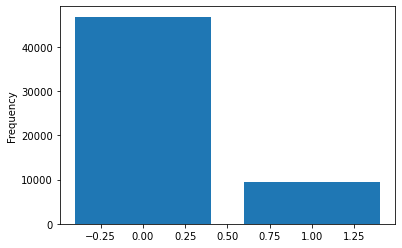

In [55]:
#Some Plots
import matplotlib.pyplot as plt

#iris = pd.read_csv("iris_imbalanced.csv")


class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

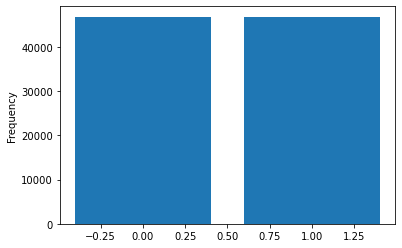

In [56]:
#Undersampling/Oversampling:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#sampler = RandomOverSampler()
sampler = RandomUnderSampler()
acc_balanced_data, acc_balanced_target = sampler.fit_resample(accidents, y)

class_dist = pd.Series(acc_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(acc_balanced_data, acc_balanced_target, test_size=0.2, random_state=42, stratify=acc_balanced_target)

In [58]:
#Plot accidents
#colors = ["red" if i==1 else 'yellow' for i in y]
#plt.figure(figsize=(15,20))
#plt.scatter(accidents['longitude'], accidents['latitude'], color = colors)

# Logistic Regression

In [59]:
#X_train

In [60]:
#Xtrain = X_train.drop(columns=['location_easting_osgr','location_northing_osgr','longitude','latitude'])
#X_test = X_test.drop(columns=['location_easting_osgr','location_northing_osgr','longitude','latitude'])

In [61]:
from sklearn.linear_model import LogisticRegression
weight_estimator = LogisticRegression()
weight_estimator.fit(X_train,y_train)

C:\Users\AS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
predictions = weight_estimator.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6956915857950304

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.6956428990453841

In [64]:
from sklearn.metrics import confusion_matrix
tn, fp, fn ,tp = confusion_matrix(y_test,predictions).ravel()

print("TP:" , tp)
print("FN:" , fn)
print("FP:" , fp)
print("TN:" , tn)

from sklearn.metrics import precision_score,recall_score
print("Precision: ",precision_score(y_test,predictions))
print("Recall: ", recall_score(y_test,predictions))

TP: 6522
FN: 2855
FP: 2852
TN: 6525
Precision:  0.6957542137828036
Recall:  0.6955316199210835


In [65]:
# The estimated coefficients will all be around 1:
print(weight_estimator.coef_)

# Those values, however, will show that the second parameter
# is more influential
X_train.columns[np.argmax(weight_estimator.coef_)]

[[-1.34406140e-02 -4.23521516e-02  2.06540147e-02  5.86115801e-02
   2.54055424e-02 -6.94666037e-02  1.45739262e-01 -1.01722119e-01
  -4.22601444e-02  4.02710927e-02  1.68951613e-01 -2.31567936e-01
   1.78574346e-02  5.13154829e-01 -2.52440030e-01 -8.85778561e-02
  -2.98846841e-02 -6.39324979e-02 -1.13865811e-02 -1.24736465e-01
   1.93576188e-02 -9.27495807e-01  4.07180925e-01  2.22467224e-02
   4.04063408e-01  7.34165187e-02  1.58551384e-02 -1.88741076e-01
   1.28412551e-01  1.91691317e-01  1.40113250e-01 -3.07919412e-01
  -7.39928339e-02  6.88938331e-03 -1.85053253e-01  4.73579262e-01
   9.10884605e-02 -1.97184813e-01 -1.83778614e-01  4.78641762e-02
   4.98541782e-01  2.13694389e-01  1.87467028e-01 -7.82501601e-01
  -1.11842813e-01 -2.59470180e-02 -1.44660106e-02  1.29712035e-01
  -1.20421144e-01 -6.16321672e-01 -1.78509588e-02  1.62266386e-01
   3.29522550e-02  6.95178349e-01 -2.71637472e-01  7.32962899e-01
   1.75905668e-01 -8.48288977e-01  2.68276331e-02  2.79569265e-01
  -3.90372

'casualty_type_120'

# Random Forrest Classifier

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

#train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, random_state=1)
model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)

In [67]:
pred = model.predict(X_test)
tn, fp, fn ,tp = confusion_matrix(y_test,pred).ravel()

print("TP:" , tp)
print("FN:" , fn)
print("FP:" , fp)
print("TN:" , tn)

from sklearn.metrics import precision_score,recall_score
print("Precision: ",precision_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))

TP: 9277
FN: 100
FP: 604
TN: 8773
Precision:  0.9388725837465843
Recall:  0.9893356084035406


In [68]:
#import eli5
#from eli5.sklearn import PermutationImportance

#perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
#eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# KNN

In [69]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train, y_train)
#NearestNeighbors(n_neighbors=2)
A = neigh.kneighbors_graph(accidents)
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
#import the MLPClassifier from neural_network from sklearn
from sklearn.neural_network import MLPClassifier
#import the pipeline from sklearn
from sklearn.pipeline import Pipeline




clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu',
learning_rate_init=1e-3, batch_size=64, verbose=True,
early_stopping=True, random_state=1234)

In [71]:
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

Iteration 1, loss = 0.58370227
Validation score: 0.711810
Iteration 2, loss = 0.54488521
Validation score: 0.726073
Iteration 3, loss = 0.50053563
Validation score: 0.738870
Iteration 4, loss = 0.45403570
Validation score: 0.773394
Iteration 5, loss = 0.40756970
Validation score: 0.786057
Iteration 6, loss = 0.36641741
Validation score: 0.800587
Iteration 7, loss = 0.33200499
Validation score: 0.815649
Iteration 8, loss = 0.30199245
Validation score: 0.830845
Iteration 9, loss = 0.27791431
Validation score: 0.832178
Iteration 10, loss = 0.25218983
Validation score: 0.824713
Iteration 11, loss = 0.23328761
Validation score: 0.844975
Iteration 12, loss = 0.21420384
Validation score: 0.848974
Iteration 13, loss = 0.19826541
Validation score: 0.847241
Iteration 14, loss = 0.18731334
Validation score: 0.864836
Iteration 15, loss = 0.17115009
Validation score: 0.859771
Iteration 16, loss = 0.16047169
Validation score: 0.864969
Iteration 17, loss = 0.15305143
Validation score: 0.867369
Iterat